In [1]:
##################################################################
# # ! Juno Magnetic Modelling using <Vector Potential> with <3 NNs>
# Plot comparison of $B_{r}$ (or other components) predicted by
# `PINN models` and `SH models` on multiple $R_j$
##################################################################
# %%
#  # ! Setup
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mptcolors
import cartopy.crs as ccrs

In [2]:
# %%

#  # ! Data
dataFiles=[
    'output/JRM33_I30_nmax18_EstBned_1.00Rj.txt',\
    'output/JRM33_I30_nmax18_EstBned_0.95Rj.txt',\
    'output/JRM33_I30_nmax18_EstBned_0.90Rj.txt',\
    'output/JRM33_I30_nmax18_EstBned_0.85Rj.txt',\
    'output/JRM33_I30_nmax18_EstBned_0.80Rj.txt',\
    'output/Bloxham_I32_nmax32_EstBned_1.00Rj.txt',\
    'output/Bloxham_I32_nmax32_EstBned_0.95Rj.txt',\
    'output/Bloxham_I32_nmax32_EstBned_0.90Rj.txt',\
    'output/Bloxham_I32_nmax32_EstBned_0.85Rj.txt',\
    'output/Bloxham_I32_nmax32_EstBned_0.80Rj.txt',\
    'output/JUNO_PINN_VP3_PJ01_50_4.0Rj_NN06_040_swish_Adam_DW1_RADk1c0n3000d600_nEpo0012000_BS0010000_Seed67890_EstBned_1.00Rj.txt',\
    'output/JUNO_PINN_VP3_PJ01_50_4.0Rj_NN06_040_swish_Adam_DW1_RADk1c0n3000d600_nEpo0012000_BS0010000_Seed67890_EstBned_0.95Rj.txt',\
    'output/JUNO_PINN_VP3_PJ01_50_4.0Rj_NN06_040_swish_Adam_DW1_RADk1c0n3000d600_nEpo0012000_BS0010000_Seed67890_EstBned_0.90Rj.txt',\
    'output/JUNO_PINN_VP3_PJ01_50_4.0Rj_NN06_040_swish_Adam_DW1_RADk1c0n3000d600_nEpo0012000_BS0010000_Seed67890_EstBned_0.85Rj.txt',\
    'output/JUNO_PINN_VP3_PJ01_50_4.0Rj_NN06_040_swish_Adam_DW1_RADk1c0n3000d600_nEpo0012000_BS0010000_Seed67890_EstBned_0.80Rj.txt'
    ]
dataFiles = dataFiles[0:15:5] + dataFiles[1:15:5] + dataFiles[2:15:5] + dataFiles[3:15:5] + dataFiles[4:15:5] ;

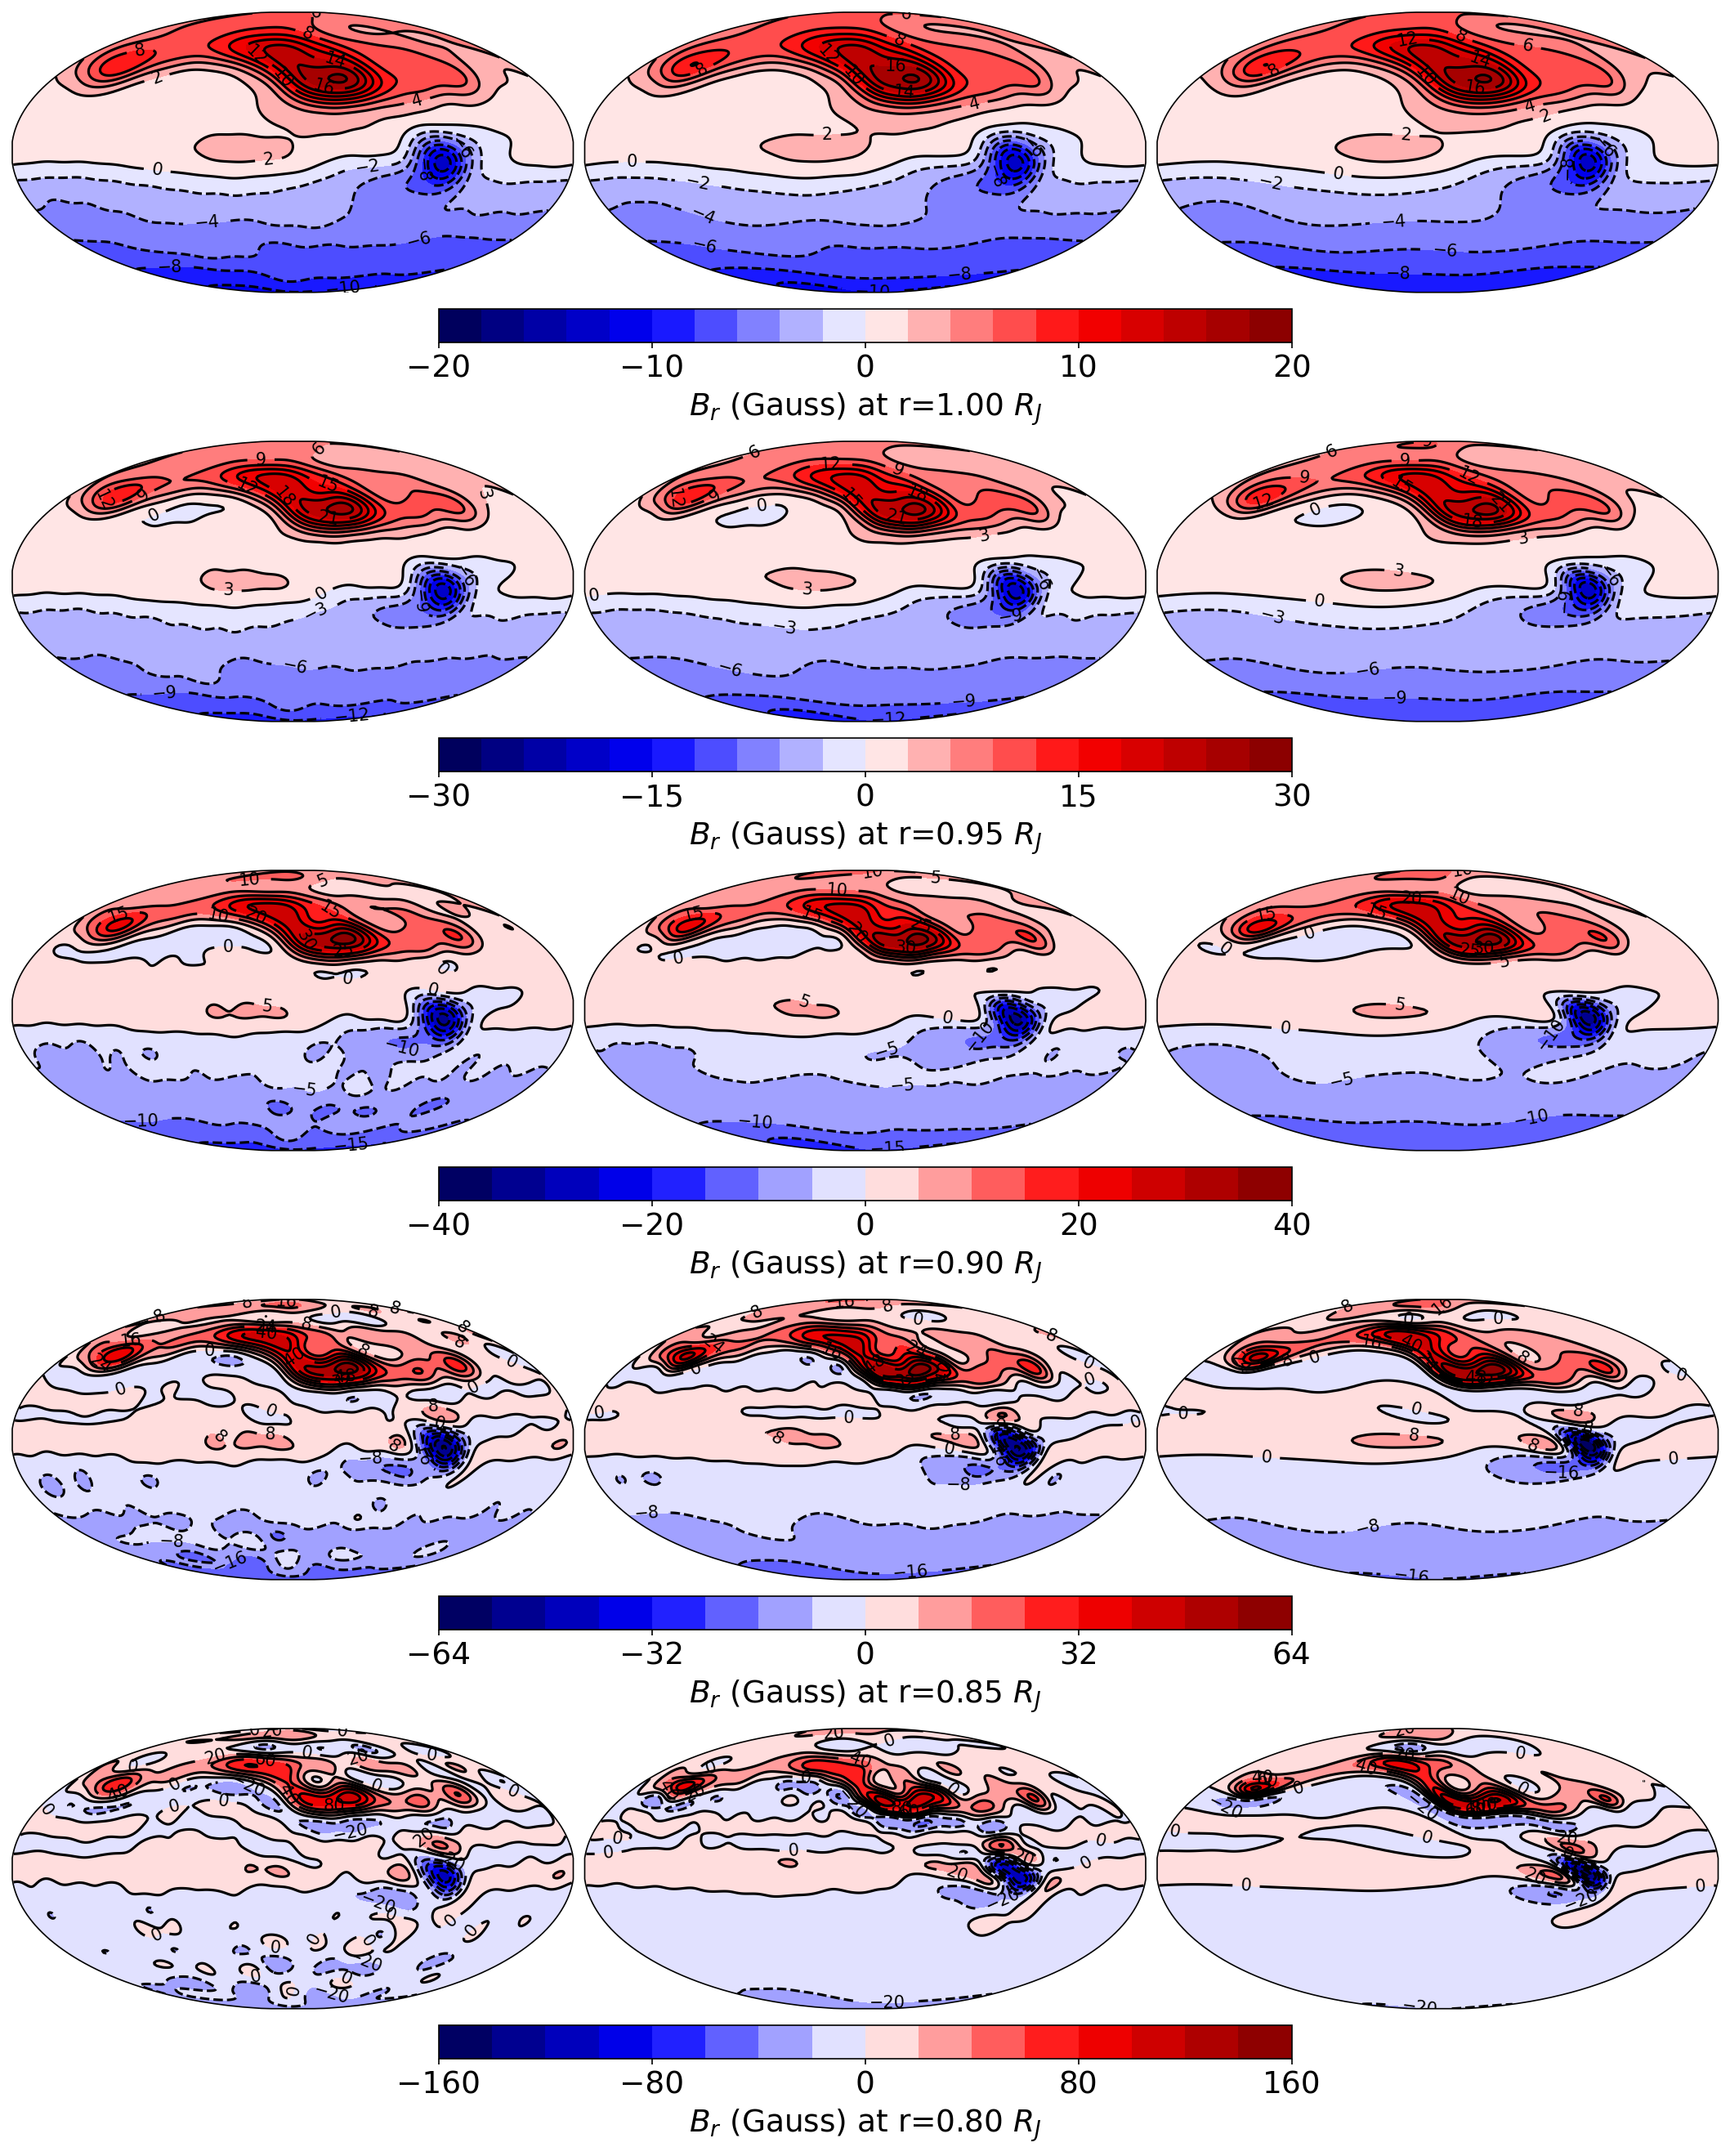

In [3]:
# %%

#  # ! Mapping
# TODO ******************** Parameters ******************** #
RJs = [1.00,0.95,0.90,0.85,0.80];
LEVELs = [np.linspace(-20,20,21),\
          np.linspace(-30,30,21),\
          np.linspace(-40,40,17),\
          np.linspace(-64,64,17),\
          np.linspace(-160,160,17)];
cbLABELs = [np.linspace(-20,20,5),\
            np.linspace(-30,30,5),\
            np.linspace(-40,40,5),\
            np.linspace(-64,64,5),\
            np.linspace(-160,160,5)];
LambdaP=np.linspace(np.deg2rad(0.5),2*np.pi-np.deg2rad(0.5),360);
ThetaP=np.linspace(np.deg2rad(0.5),np.pi-np.deg2rad(0.5),180); # ! Co-latitude
comp='Br';        # Blambda; Btheta; Br; BNorm
# TODO ********************** end ************************* #
LambdaP2d,ThetaP2d = np.meshgrid(LambdaP,ThetaP);
fig1=plt.figure(figsize=(14,17.5),dpi=150,layout='constrained');
AXES=[[None for j in range(3)] for i in range(5)];
for iFile in range(len(dataFiles)):
    dataBned =np.loadtxt(dataFiles[iFile],skiprows=1);
    Btheta  = dataBned[:,2:3];
    Blambda = dataBned[:,3:4];
    Br      = dataBned[:,4:5];
    BNorm   = dataBned[:,5:6];
    match comp:
        case 'Blambda':
            strComp='$B_{\\lambda}$';
            dataComp=Blambda;
        case 'Btheta':
            strComp='$B_{\\theta}$';
            dataComp=Btheta;
        case 'Br':
            strComp='$B_{r}$';
            dataComp=Br;
        case 'BNorm':
            strComp='$|B|$';
            dataComp=BNorm;
    ax1 = fig1.add_subplot(5,3,iFile+1,projection=ccrs.Mollweide(central_longitude=180));
    AXES[iFile//3][iFile%3] = ax1;
    Lon=np.flipud(np.rad2deg(LambdaP2d));
    Lat=np.flipud(np.rad2deg(np.pi/2-ThetaP2d));
    zData=np.flipud(np.reshape(dataComp,LambdaP2d.shape));
    # Avoid strange behavior of <cartopy for mollweide> <fix bugs maybe>
    Lon=Lon[1:-1,:]; Lat=Lat[1:-1,:];zData=zData[1:-1,:];
    cs1=ax1.contourf(Lon,Lat,zData,LEVELs[iFile//3],cmap='seismic',\
        transform=ccrs.PlateCarree());
    ct1=ax1.contour(Lon,Lat,zData,LEVELs[iFile//3],colors='k',\
        transform=ccrs.PlateCarree());
    plt.clabel(ct1, colors = 'k');
    # ! Draw only one colorbar for each row
    if (iFile % 3 ==2):
        cb1=fig1.colorbar(cs1, ax=AXES[iFile//3],\
            fraction=0.12, shrink=1, aspect=25,\
            ticks=cbLABELs[iFile//3], location='bottom');
        cb1.ax.tick_params(labelsize=18);
        cbLabel = strComp + ' (Gauss) at r=%.2f $R_{J}$'%(RJs[iFile//3]);
        cb1.set_label(cbLabel,fontsize=18);
plt.savefig('Fig4.png', dpi=300, bbox_inches='tight');   
plt.show();